In [1]:
import pandas as pd
from pandas import Series , DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas.io.data import DataReader


/Users/chrislattanzio/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
from datetime import datetime

In [4]:
from __future__ import division

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)


In [7]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,104.197470,105.095731,103.309051,104.240000,3.922625e+07,103.096603
std,7.224142,7.176002,7.246722,7.236394,1.738087e+07,7.508012
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.320000,98.209999,96.580002,97.139999,2.740430e+07,95.855921
50%,105.519997,106.309998,104.820000,105.709999,3.409410e+07,104.167072
75%,109.809998,110.610001,108.980003,109.949997,4.596430e+07,109.110001
max,118.180000,118.690002,117.449997,118.250000,1.333697e+08,117.645979


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-12-10 to 2016-12-09
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


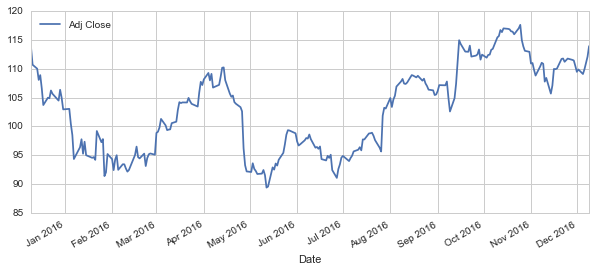

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

In [11]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = Series.rolling(AAPL['Adj Close'],window=ma).mean()


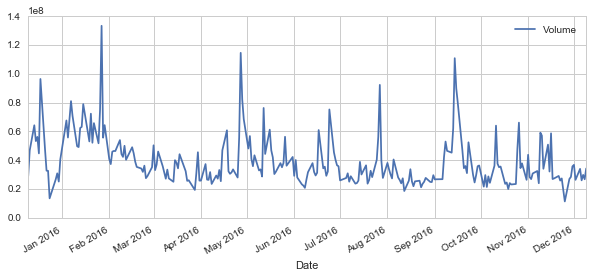

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

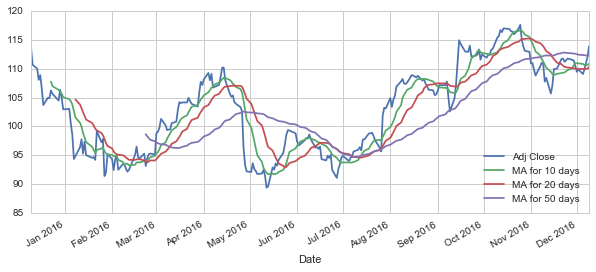

In [22]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

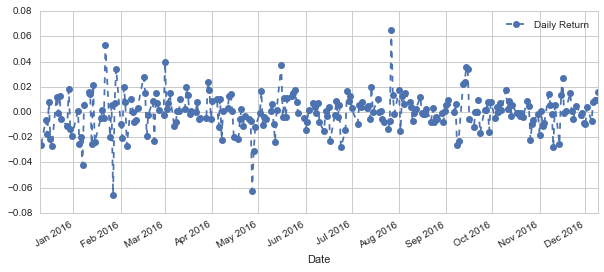

In [23]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

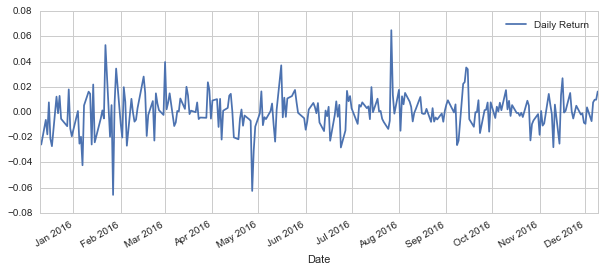

In [24]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

/Users/chrislattanzio/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


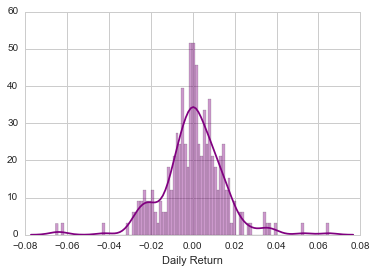

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

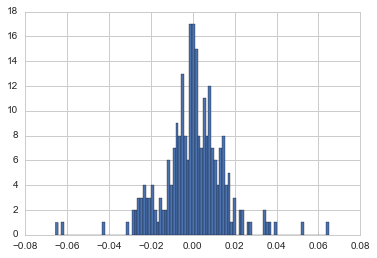

In [26]:
AAPL['Daily Return'].hist(bins=100)

In [14]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [15]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-10,113.641566,662.320007,749.460022,53.793885
2015-12-11,110.716645,640.150024,738.869995,52.616202
2015-12-14,110.031884,657.909973,747.770020,53.667356
2015-12-15,108.085190,658.640015,743.400024,53.725755
2015-12-16,108.916689,675.770020,758.090027,54.630917


In [16]:
tech_rets = closing_df.pct_change()

In [17]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-10,NaN,NaN,NaN,NaN
2015-12-11,-0.025738,-0.033473,-0.014130,-0.021893
2015-12-14,-0.006185,0.027743,0.012045,0.019978
2015-12-15,-0.017692,0.001110,-0.005844,0.001088
2015-12-16,0.007693,0.026008,0.019761,0.016848


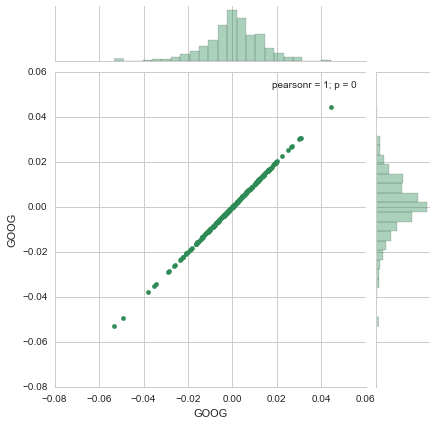

In [31]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

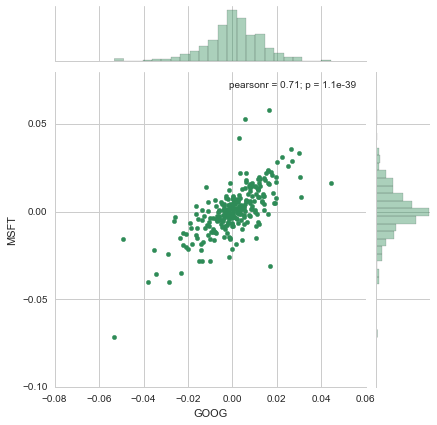

In [32]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter',color='seagreen')

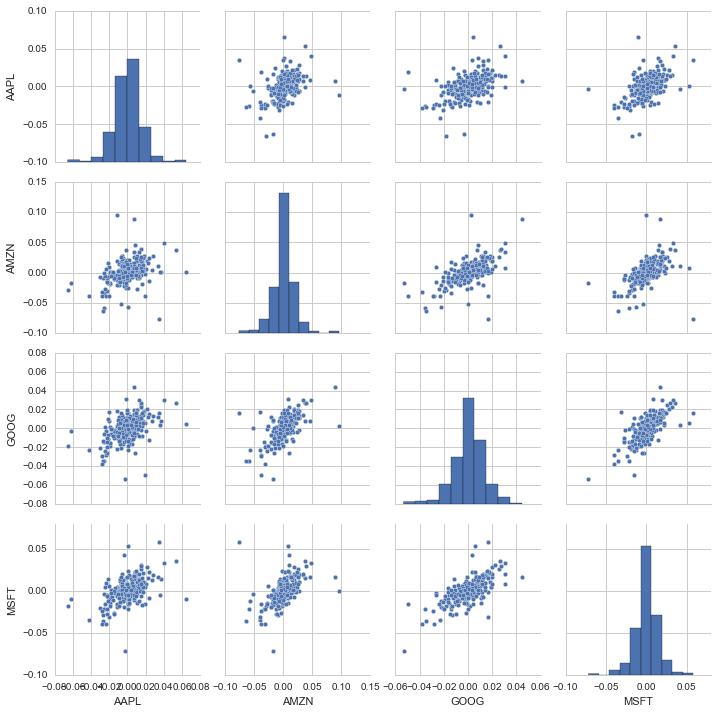

In [33]:
sns.pairplot(tech_rets.dropna())

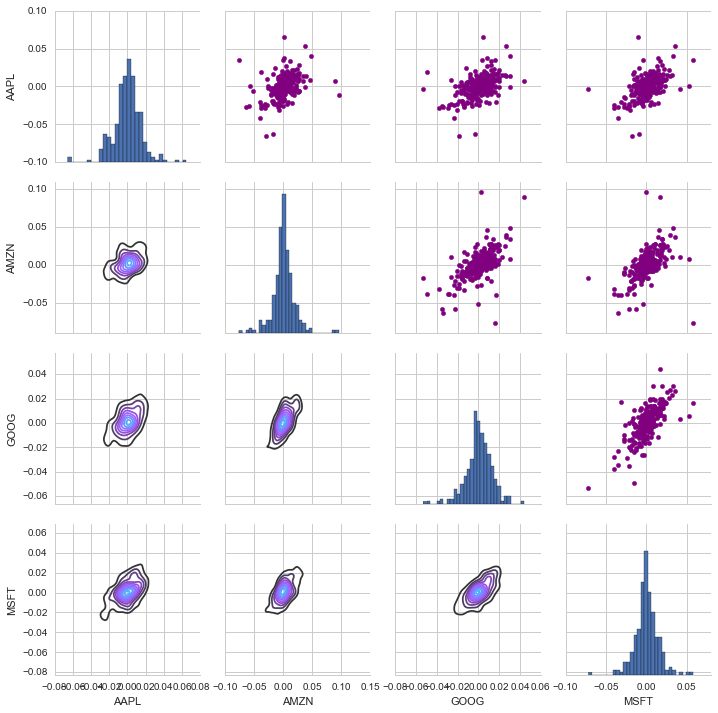

In [34]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

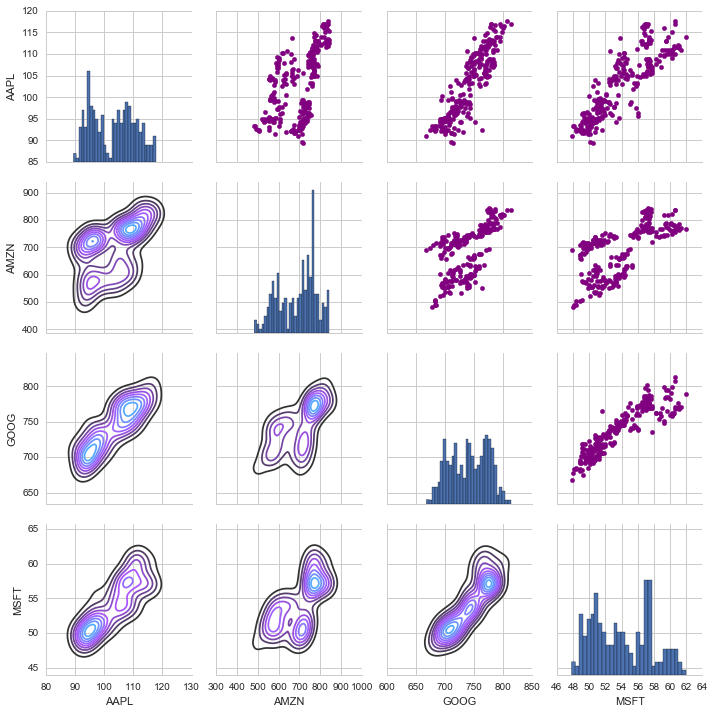

In [35]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

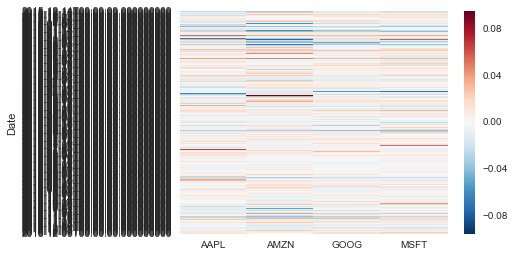

In [36]:
sns.heatmap(tech_rets.dropna())

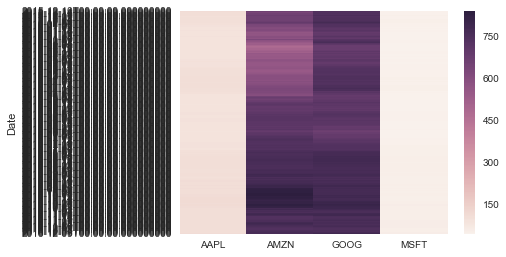

In [37]:
sns.heatmap(closing_df.dropna())

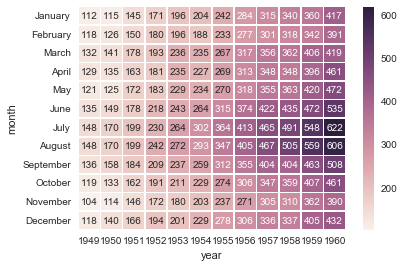

In [38]:
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

In [39]:
#basic Risk Analyst
rets = tech_rets.dropna()

In [40]:
area = np.pi*20

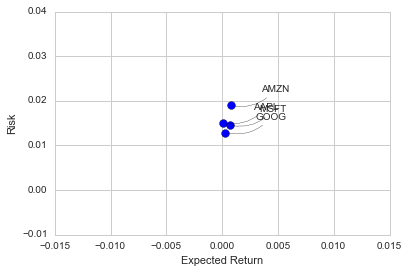

In [41]:
plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (30, 20),
        textcoords = 'offset points', ha = 'left', va = 'top',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))

/Users/chrislattanzio/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


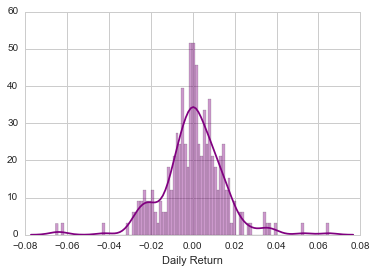

In [42]:
# Value at Risk - value of money that can be lost
# Bootstrap method

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')



In [43]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-11,-0.025738,-0.033473,-0.014130,-0.021893
2015-12-14,-0.006185,0.027743,0.012045,0.019978
2015-12-15,-0.017692,0.001110,-0.005844,0.001088
2015-12-16,0.007693,0.026008,0.019761,0.016848
2015-12-17,-0.021196,-0.007577,-0.011423,-0.007661


In [44]:
rets['AAPL'].quantile(0.05)*1000000*-1
#at a 95% certainty expected daily losses are:

24485.090618909533

In [45]:
# Value at risk Monte Carlo method
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [46]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [47]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-10,752.849976,755.849976,743.830017,749.460022,1984900,749.460022
2015-12-11,741.159973,745.710022,736.750000,738.869995,2224400,738.869995
2015-12-14,741.789978,748.729980,724.169983,747.770020,2412500,747.770020
2015-12-15,753.000000,758.080017,743.010010,743.400024,2666200,743.400024
2015-12-16,750.000000,760.590027,739.434998,758.090027,1993300,758.090027


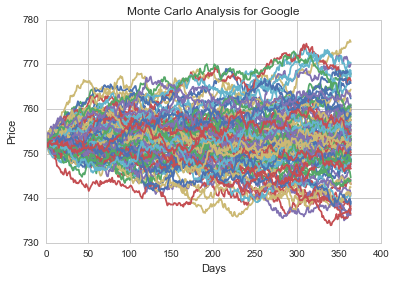

In [48]:
start_price = 752.84

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [55]:
runs = 10000

sims = np.zeros(runs)

for run in range(runs):
    sims[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [56]:
q = np.percentile(sims,1)

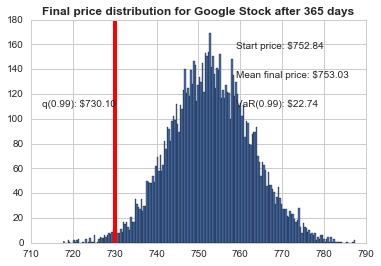

In [57]:
plt.hist(sims,bins=200)

#start price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
#mean end price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %sims.mean())

#variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

#display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" %q)

#plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

#title
plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold');


